# Planning Stage: Data Description & Exploratory Data Analysis and Visualization

In [2]:
# libraries needed in this analysis

library(tidyverse)
library(repr)
library(broom)
library(GGally)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




## 1. Data Description

We begin by downloading and reading the "Data Science Job Salaries" dataset from Kaggle, and viewing the first 10 examples of the data. 

> https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [3]:
data <- read_csv("data/ds_salaries.csv", col_names = TRUE, show_col_types = FALSE)

head(data, n = 10)

New names:
• `` -> `...1`


...1 work_year experience_level employment_type job_title                 
1  0    2020      MI               FT              Data Scientist            
2  1    2020      SE               FT              Machine Learning Scientist
3  2    2020      SE               FT              Big Data Engineer         
4  3    2020      MI               FT              Product Data Analyst      
5  4    2020      SE               FT              Machine Learning Engineer 
6  5    2020      EN               FT              Data Analyst              
7  6    2020      SE               FT              Lead Data Scientist       
8  7    2020      MI               FT              Data Scientist            
9  8    2020      MI               FT              Business Data Analyst     
10 9    2020      SE               FT              Lead Data Engineer        
   salary   salary_currency salary_in_usd employee_residence remote_ratio
1     70000 EUR              79833        DE                   0         
2    260000 USD             260000        JP                   0         
3     85000 GBP             109024        GB                  50         
4     20000 USD              20000        HN                   0         
5    150000 USD             150000        US                  50         
6     72000 USD              72000        US                 100         
7    190000 USD             190000        US                 100         
8  11000000 HUF              35735        HU                  50         
9    135000 USD             135000        US                 100         
10   125000 USD             125000        NZ                  50         
   company_location company_size
1  DE               L           
2  JP               S           
3  GB               M           
4  HN               S           
5  US               L           
6  US               L           
7  US               S           
8  HU               L           
9  US               L           
10 NZ               S

### Description

This dataset from Kaggle provides information on the salaries of data science professionals, along with other characteristics of their job and experience. The dataset can be used to gain insights into the relationships between variables of a data science job - it is valuable for answering predictive questions and for performing analyses on these relationships. 

In total, there are 11 variables (excluding the first indexing column) and 607 observations. There is limited information on where the information is sourced from or obtained; however, the author acknowledges ai-jobs.net Salaries for aggregating this data.

#### Variables: 

1. `work_year` (`dbl`): The year the salary was paid

2. `experience_level` (`chr`): The experience level in the job during the year with the following possible values:
    - EN: Entry-level / Junior
    - MI: Mid-level / Intermediate
    - SE: Senior-level / Expert
    - EX: Executive-level / Director
      
   <br>
3. `employment_type` (`chr`): The type of employement for the role:

   - PT: Part-time
   - FT: Full-time
   - CT: Contract
   - FL: Freelance

    <br>
4. `job_title` (`chr`): The role worked in during the year

5. `salary` (`dbl`): The total gross salary amount paid

6. `salary_currency` (`chr`): The currency of the salary paid as an ISO 4217 currency code

7. `salary_in_usd` (`dbl`): The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)

8. `employee_residence` (`chr`): Employee's primary country of residence in during the work year as an ISO 3166 country code

9. `remote_ratio` (`dbl`): The overall amount of work done remotely, possible values are as follows:

    - 0: No remote work (less than 20%)
    - 50: Partially remote
    - 100: Fully remote (more than 80%)

    <br>
10. `company_location` (`chr`): The country of the employer's main office or contracting branch as an ISO 3166 country code.

11. `company_size` (`chr`): The average number of people that worked for the company during the year:

    - S: less than 50 employees (small)
    - M: 50 to 250 employees (medium)
    - L: more than 250 employees (large)

## 2. Question

It is important to understand the various factors and variables that determine a data science job salary, as it provides valuable insights to employees, companies, and general knowledge of trends within this career. For employees (data scientists), knowing the attributes of a job that impacts the salary can influence their decisions prior to applying to positions. From a company's perspective, having information on the influencing factors could be leveraged for their recruitment process and strategies. Hence, the **inference** question I will be answering is:

> Which attributes of a data science job and/or employee best predicts the data scientist's salary in USD?

Since we aim to predict the data scientist's salary in USD, the response variable is `salary_in_usd`. In the process to determine the variables that influence the salary, I will be using all variables from the data as potential inputs and explanatory variables in my model selection process.

To answer this question, I will be using both forward and backward selection. By comparing the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and/or Mallows's Cp across models, I will determine the best model for prediction. Another method I will use to select variables is L1-regularization (LASSO) for robust linear regression and compare these outcomes as well. LASSO is particularly effective for variable selection as it shrinks coefficients toward zero, thus it can be used to simultaneously select and train (estimate) a model. 

## 3. Exploratory Data Analysis and Visualization

### Initial Dataset

The following functions are used to understand the dataset's contents and structure: `head` displays the first 6 rows of the dataset. `summary` provides a summary for each variable - it displays the minimum, first quartile, median, mean, third quartile, and maximum values for numerical variables, and it shows the frequency count of each level for categorical variables. `str` displays the structure of the dataset, such as the type of each column and their first few entries.

In [4]:
head(data)
summary(data)
str(data)

...1 work_year experience_level employment_type job_title                 
1 0    2020      MI               FT              Data Scientist            
2 1    2020      SE               FT              Machine Learning Scientist
3 2    2020      SE               FT              Big Data Engineer         
4 3    2020      MI               FT              Product Data Analyst      
5 4    2020      SE               FT              Machine Learning Engineer 
6 5    2020      EN               FT              Data Analyst              
  salary salary_currency salary_in_usd employee_residence remote_ratio
1  70000 EUR              79833        DE                   0         
2 260000 USD             260000        JP                   0         
3  85000 GBP             109024        GB                  50         
4  20000 USD              20000        HN                   0         
5 150000 USD             150000        US                  50         
6  72000 USD              72000        US                 100         
  company_location company_size
1 DE               L           
2 JP               S           
3 GB               M           
4 HN               S           
5 US               L           
6 US               L

      ...1         work_year    experience_level   employment_type   
 Min.   :  0.0   Min.   :2020   Length:607         Length:607        
 1st Qu.:151.5   1st Qu.:2021   Class :character   Class :character  
 Median :303.0   Median :2022   Mode  :character   Mode  :character  
 Mean   :303.0   Mean   :2021                                        
 3rd Qu.:454.5   3rd Qu.:2022                                        
 Max.   :606.0   Max.   :2022                                        
  job_title             salary         salary_currency    salary_in_usd   
 Length:607         Min.   :    4000   Length:607         Min.   :  2859  
 Class :character   1st Qu.:   70000   Class :character   1st Qu.: 62726  
 Mode  :character   Median :  115000   Mode  :character   Median :101570  
                    Mean   :  324000                      Mean   :112298  
                    3rd Qu.:  165000                      3rd Qu.:150000  
                    Max.   :30400000                      Ma

spc_tbl_ [607 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:607] 0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : num [1:607] 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ experience_level  : chr [1:607] "MI" "SE" "SE" "MI" ...
 $ employment_type   : chr [1:607] "FT" "FT" "FT" "FT" ...
 $ job_title         : chr [1:607] "Data Scientist" "Machine Learning Scientist" "Big Data Engineer" "Product Data Analyst" ...
 $ salary            : num [1:607] 70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : chr [1:607] "EUR" "USD" "GBP" "USD" ...
 $ salary_in_usd     : num [1:607] 79833 260000 109024 20000 150000 ...
 $ employee_residence: chr [1:607] "DE" "JP" "GB" "HN" ...
 $ remote_ratio      : num [1:607] 0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : chr [1:607] "DE" "JP" "GB" "HN" ...
 $ company_size      : chr [1:607] "L" "S" "M" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  .

### Cleaning and Wrangling Data

From the summaries obtained above, we note that the first column is simply used for indexing the rows, so it should be removed. Additionally, the columns corresponding to categorical variables are not yet factors, so we need to convert them with `as.factor()`.

In [5]:
# remove the first column
data <- data[, -1]

# convert character columns to factors
data <- data %>%
  mutate(
    employment_type = as.factor(employment_type),
    job_title = as.factor(job_title),
    salary_currency = as.factor(salary_currency),
    employee_residence = as.factor(employee_residence),
    company_location = as.factor(company_location),
    company_size = as.factor(company_size),
    experience_level = as.factor(experience_level)
  )

head(data)

work_year experience_level employment_type job_title                  salary
1 2020      MI               FT              Data Scientist              70000
2 2020      SE               FT              Machine Learning Scientist 260000
3 2020      SE               FT              Big Data Engineer           85000
4 2020      MI               FT              Product Data Analyst        20000
5 2020      SE               FT              Machine Learning Engineer  150000
6 2020      EN               FT              Data Analyst                72000
  salary_currency salary_in_usd employee_residence remote_ratio
1 EUR              79833        DE                   0         
2 USD             260000        JP                   0         
3 GBP             109024        GB                  50         
4 USD              20000        HN                   0         
5 USD             150000        US                  50         
6 USD              72000        US                 100         
  company_location company_size
1 DE               L           
2 JP               S           
3 GB               M           
4 HN               S           
5 US               L           
6 US               L

In [6]:
# check for NA values
colSums(is.na(data))

work_year   experience_level    employment_type          job_title 
                 0                  0                  0                  0 
            salary    salary_currency      salary_in_usd employee_residence 
                 0                  0                  0                  0 
      remote_ratio   company_location       company_size 
                 0                  0                  0

There are no missing (N/A) values in our dataset. 

Upon inspection of the dataset, all variables appear correctly formatted, so no more data cleaning or wrangling will be needed at this exploratory stage.

### Visualizations

#### Histogram of Job Salaries (USD)

Before visualizing the relationships between input variables, we should start with understanding the distribution of the response variable, `salary_in_usd`. Analyzing the distribution of the salary is important, as it provides insight on:
- Distribution Shape: Skewed distributions can impact the model's predicition accuracy, and reveal key relationships between the response and certain categorical variables. It can also be an indication that a transformation (such as log), may be needed. Although not required for the response, having a normally distributed response variable may be beneficial to follow the assumptions of linear regression. 
- Outliers: Presence of outliers can greatly impact model performance and interpretation, so prior to fitting model, we should observe whether these outliers are relevant and help us decide whether they should be kept or removed in the analysis.

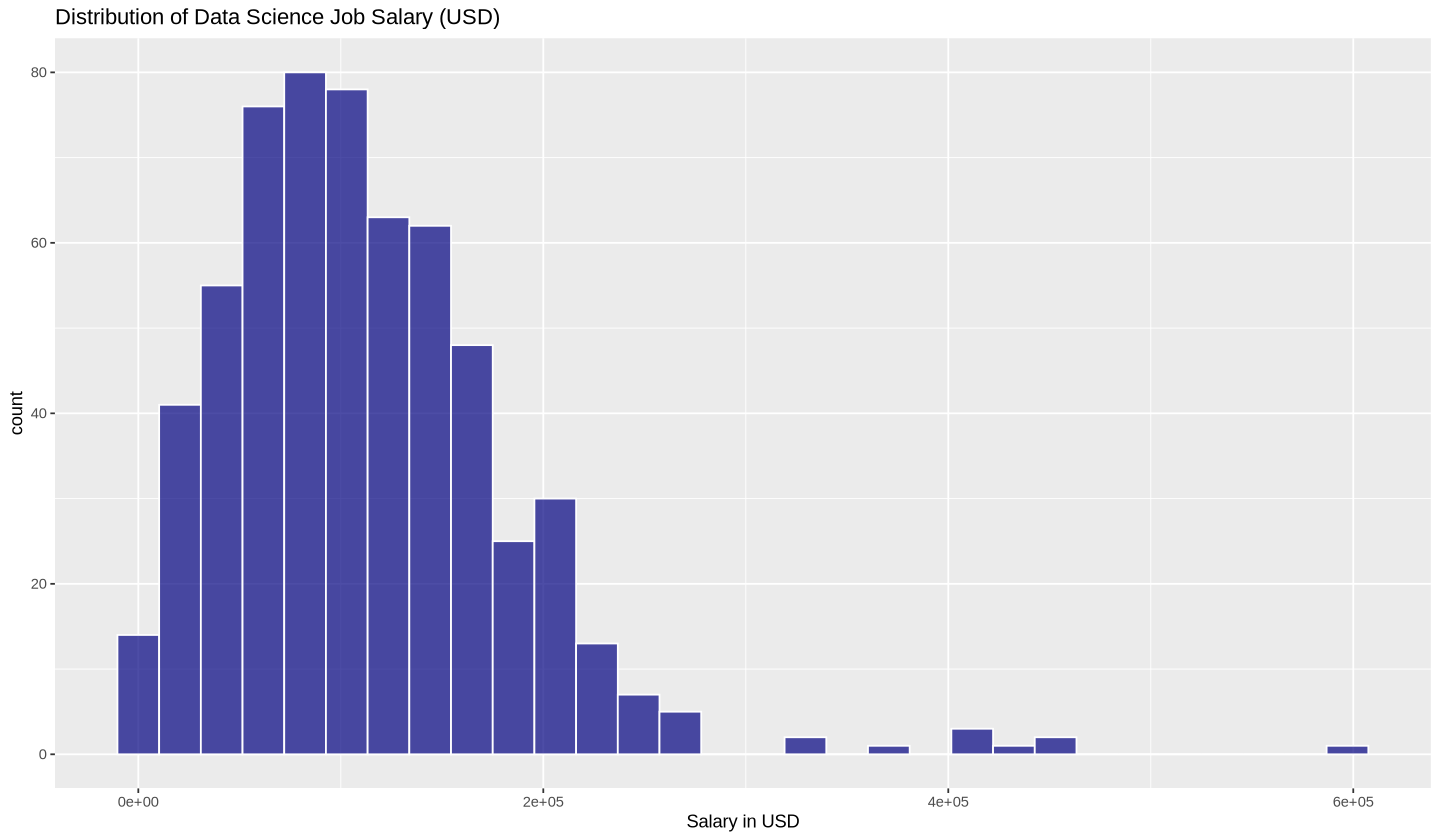

In [7]:
options(repr.plot.width = 12, repr.plot.height = 7) 

salary_usd_distribution <- 
    ggplot(data, aes(x = salary_in_usd)) +
    geom_histogram(bins = 30, fill = "navyblue", color = "white", alpha = 0.7) +
    labs(title = "Distribution of Data Science Job Salary (USD)", x = "Salary in USD")

salary_usd_distribution

The distribution is skewed right, with most of the salary centered around `$100,000` USD, and very few on the right end at `$600,000`. This skewness indicates that we may potentially need a transformation or use robust linear regression in the model.

#### Pairwise Plot

To understand the correlations and patterns between pairs of variables, we use `ggpairs` to visualize these relationships. This can detect multicollinearity issues, as well as general trends between input variables and the response.

As there are a large number of variables in the original dataset, only a subset of them will be used for our `ggpairs` pairwise plot visualization. The following variables were removed:

- `employee_residence`: This variable correlates closely with `company_location`, and `company_location` will likely be more relevant in analyzing salary and employment. Additionally, to avoid issues with mutlicollinearity, such as increased SE and reduced interpretability of the coefficients, this variable is removed from the pairwise analysis.
- `salary_currency` and `salary`: Both variables are removed from the visualization for similar reasons - they can often be inferred from other variables, such as `company_location` and `salary_in_usd`, so we remove it to reduce redundancy.
- `job_title` and `company_location`: Both variables have 50 levels (distinct values), so to avoid overcluttering on the plot, separate box plots are shown later in the data analysis to explore the salary distribution across different job titles and company locations.

In [8]:
data %>% summarise(
    job_title_levels = n_distinct(job_title),
    company_location_levels = n_distinct(company_location)
)

job_title_levels company_location_levels
1 50               50

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


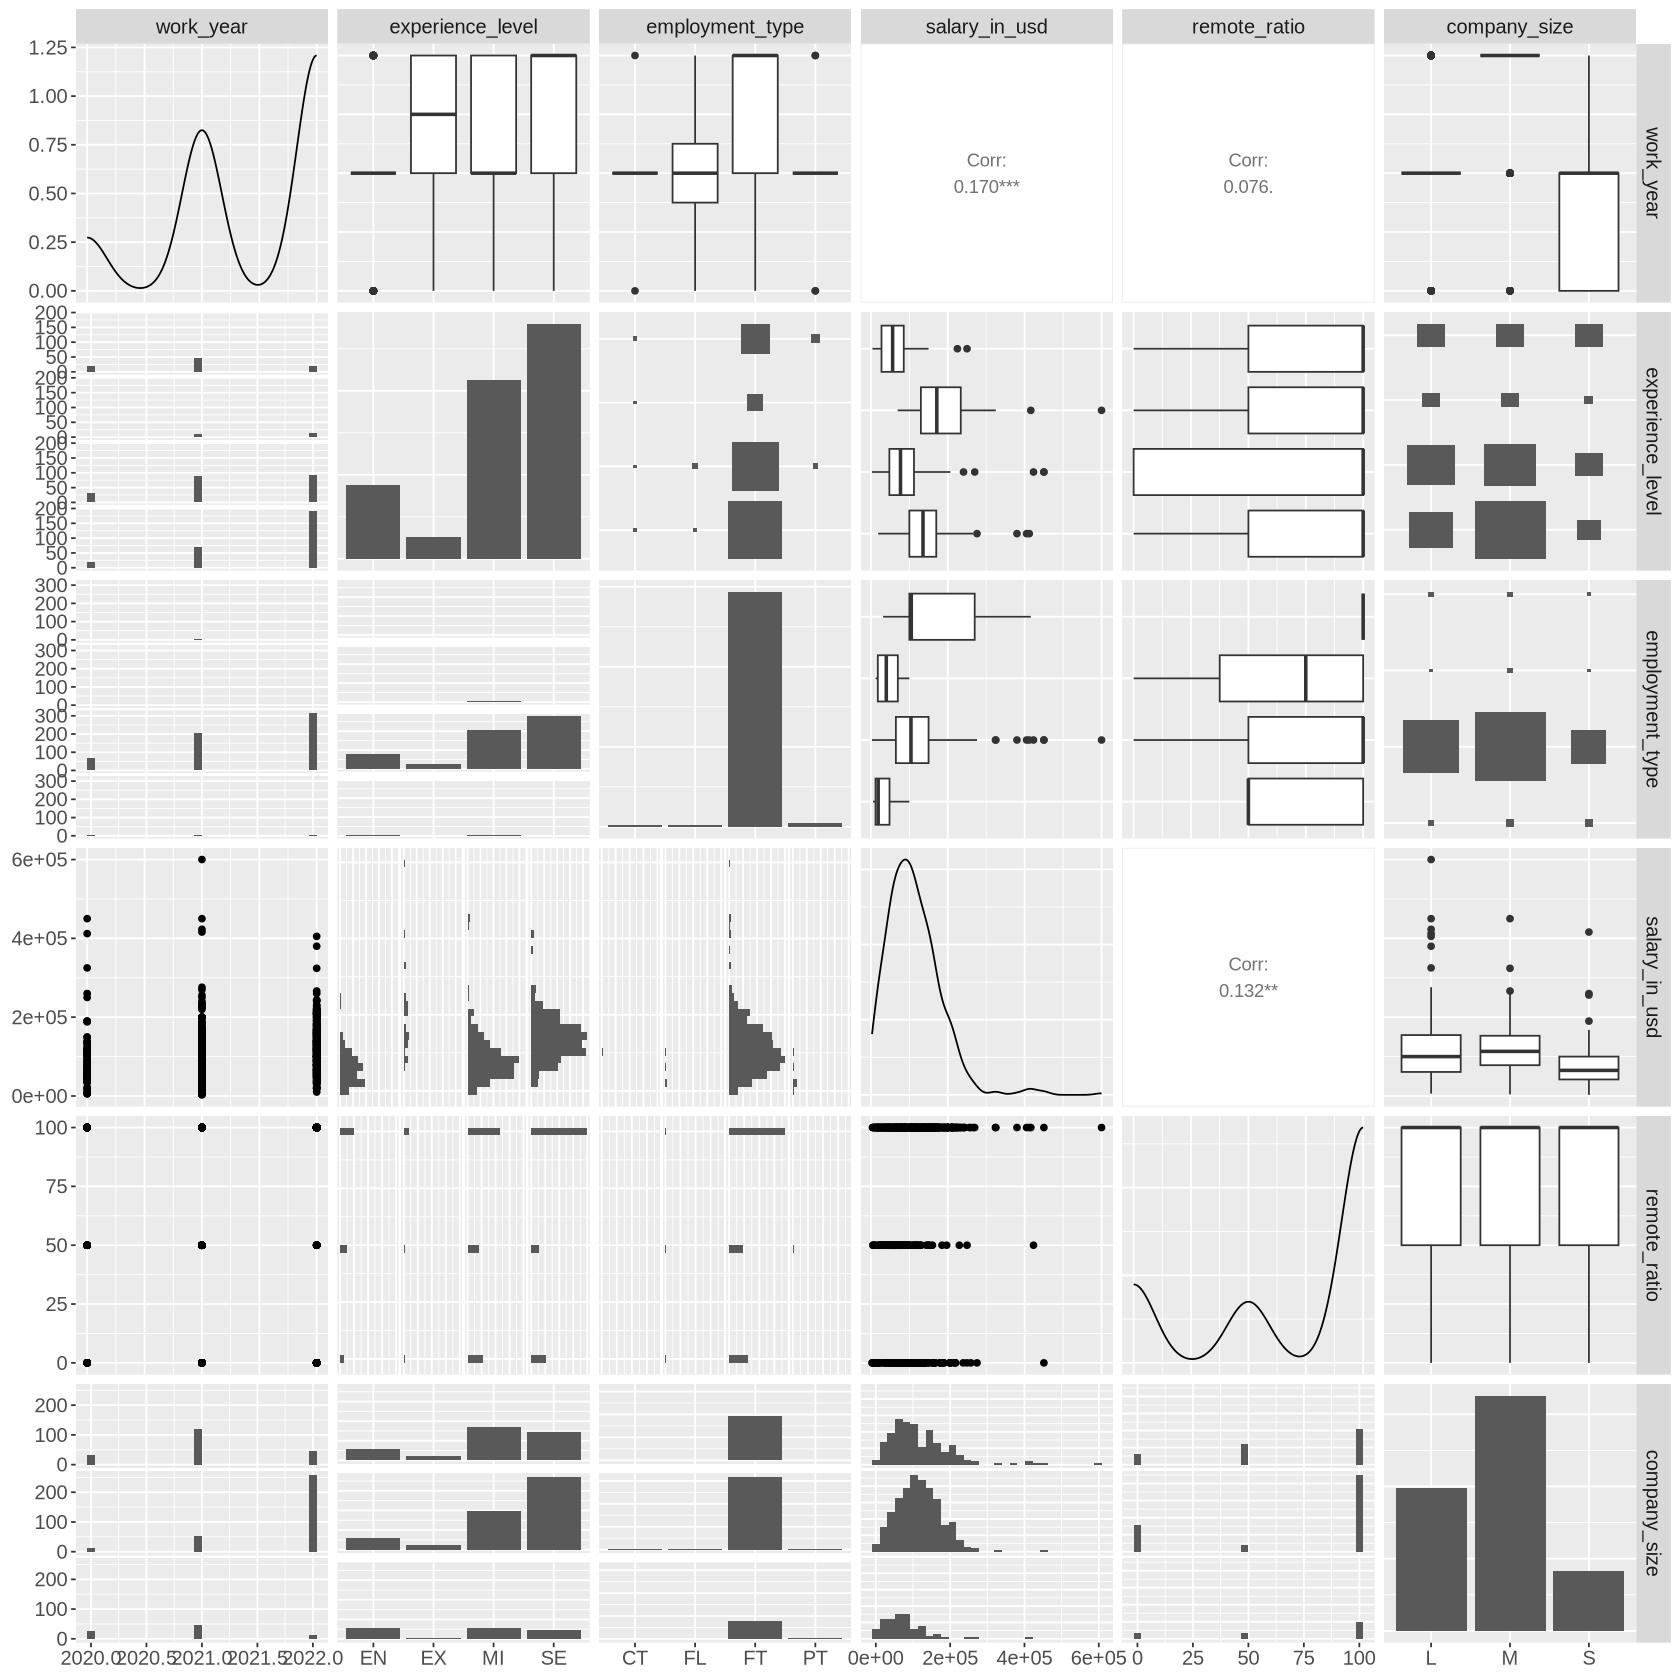

In [22]:
options(repr.plot.width = 14, repr.plot.height = 14) 

ds_salaries_pair_plots <- 
    data %>%
    select(-salary_currency, -salary, -employee_residence, -job_title, -company_location) %>%
    ggpairs(progress = FALSE, cardinality_threshold = 57) + 
    theme(text = element_text(size = 15))

ds_salaries_pair_plots

Multicollinearity is an issue we want to avoid in linear regression - it inflates the standard error of the regression estimator. From the results of the `ggpairs` pairwise plot, we observe that none of the numerical input variables are highly correlated since all absolute correlation values are less than 0.2. To be more certain of this, we will also confirm by using the Variance Inflation Factor (VIF).  

#### Variance Inflation Factor (VIF)

We will use the Variance Inflation Factor (VIF) to help quantify multicollinearity in a dataset. VIF ranges from 1 (no multicollinearity) to infinity - the smaller the VIF, the lower the sign of multicollinearity.

*Note: James et al. (2013) in An Introduction to Statistical Learning (see Section 3.3.3 in Subsection Collinearity) indicate that, as a rule of thumb, a VIF value that exceeds 5 or 10 is an indicator of a multicollinearity problem.*

In [10]:
mlr_model <- lm(salary_in_usd ~ ., data = select(data, where(is.numeric)))

vif_values <- vif(mlr_model)
vif_values

work_year       salary remote_ratio 
    1.013481     1.007793     1.005922

None of the numerical variables have a VIF value over 5, so multicollinearity is not an issue among these variables.

#### Box Plots for Categorical Variables

For the categorical variables, we will create box plots to visualize and analyze the distributions, central tendency, and identify outliers. First, we plot the categorical variables `company_size`, `employment_type`, `experience_level`, and `remote_ratio` against `salary_in_usd` as they have a fixed number of categories.

Warning message:
“attributes are not identical across measure variables; they will be dropped”


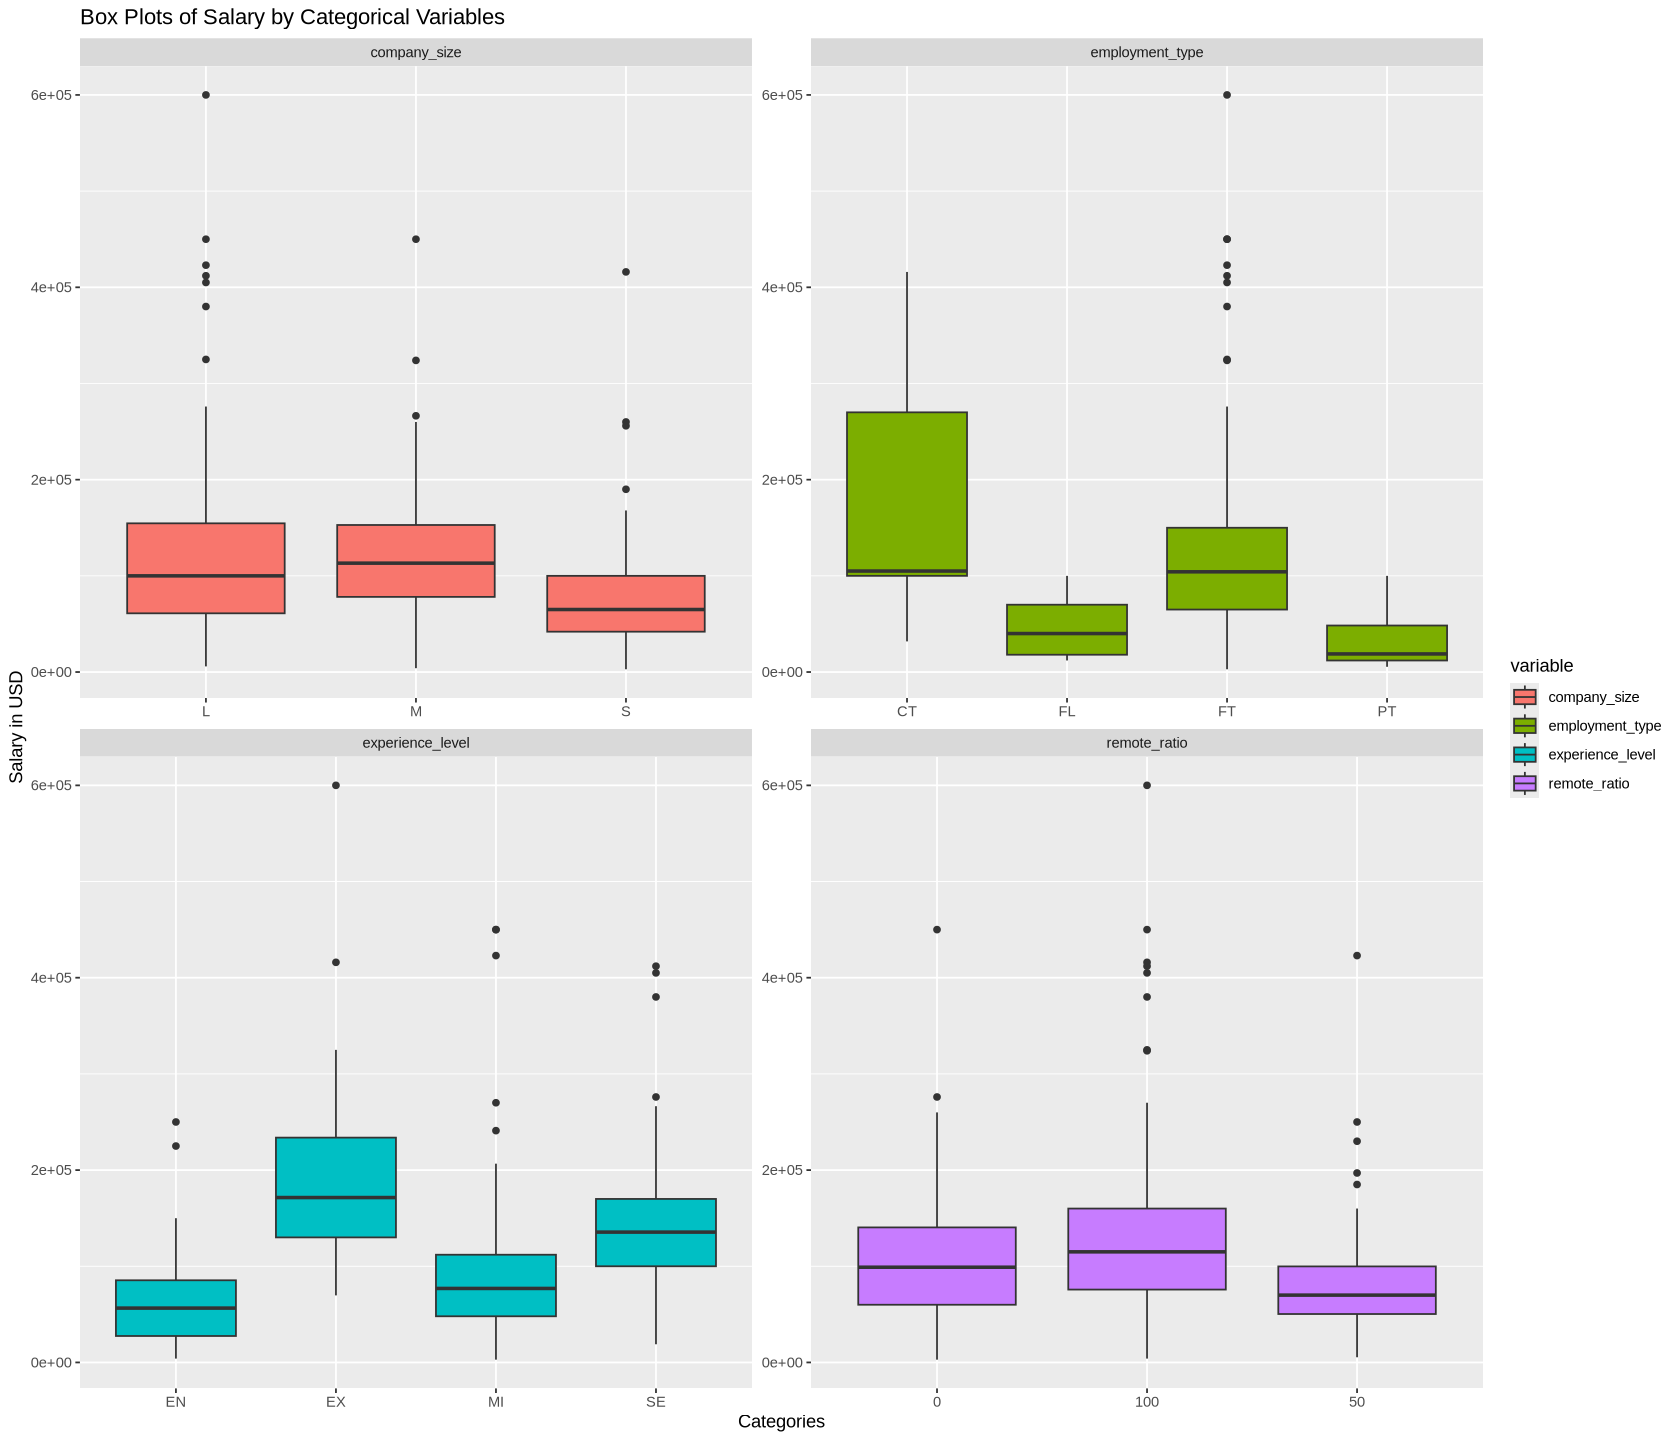

In [11]:
options(repr.plot.width = 14, repr.plot.height = 12) 

categorical_box_plot <- data %>%
    gather(key = "variable", value = "value", employment_type, experience_level, remote_ratio, company_size) %>% 
    ggplot(aes(x = value, y = salary_in_usd, fill = variable)) +
    geom_boxplot() +
    labs(title = "Box Plots of Salary by Categorical Variables",
       x = "Categories",
       y = "Salary in USD") +
    facet_wrap(~ variable, scales = "free")

categorical_box_plot

To gain insights on how data science job salaries vary across different job titles and company locations, we create box plots for the categorical variables `job_title` and `company_location`. For better readability of the long categorical variable levels, `coord_flip` is used to switch the axis.

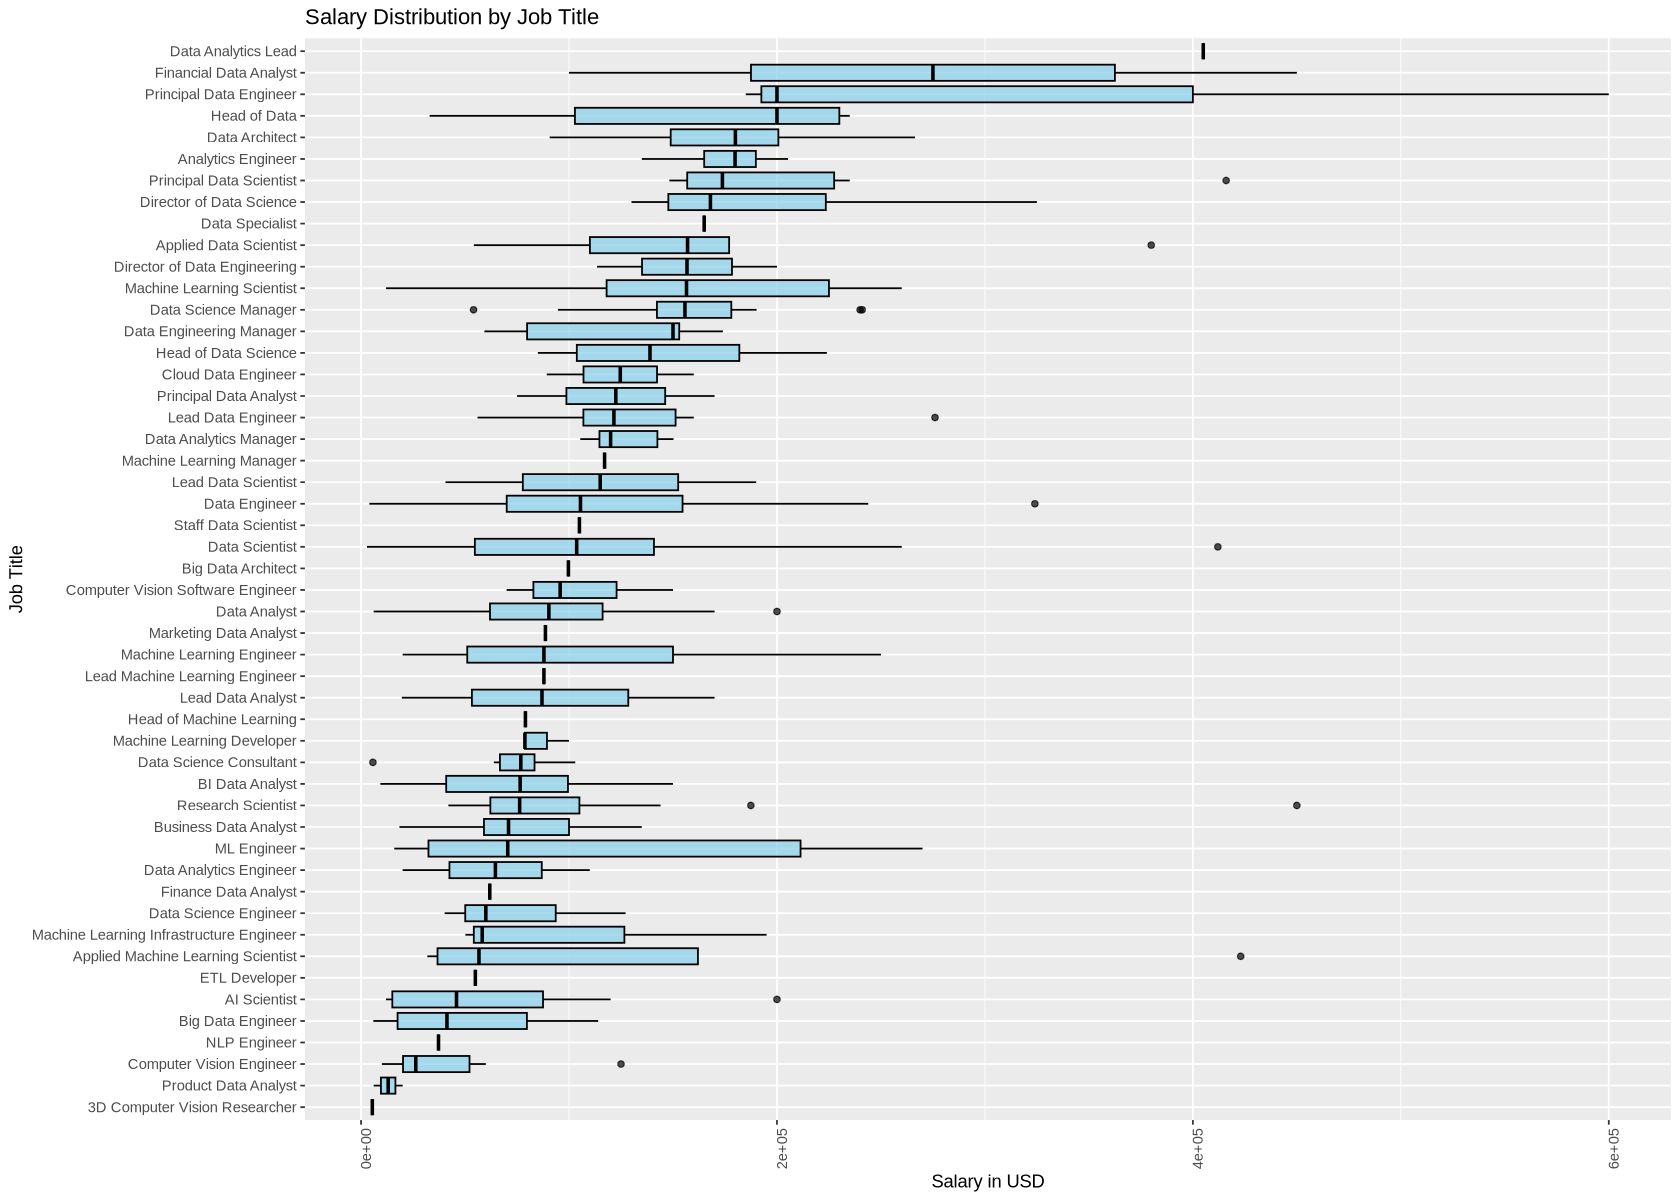

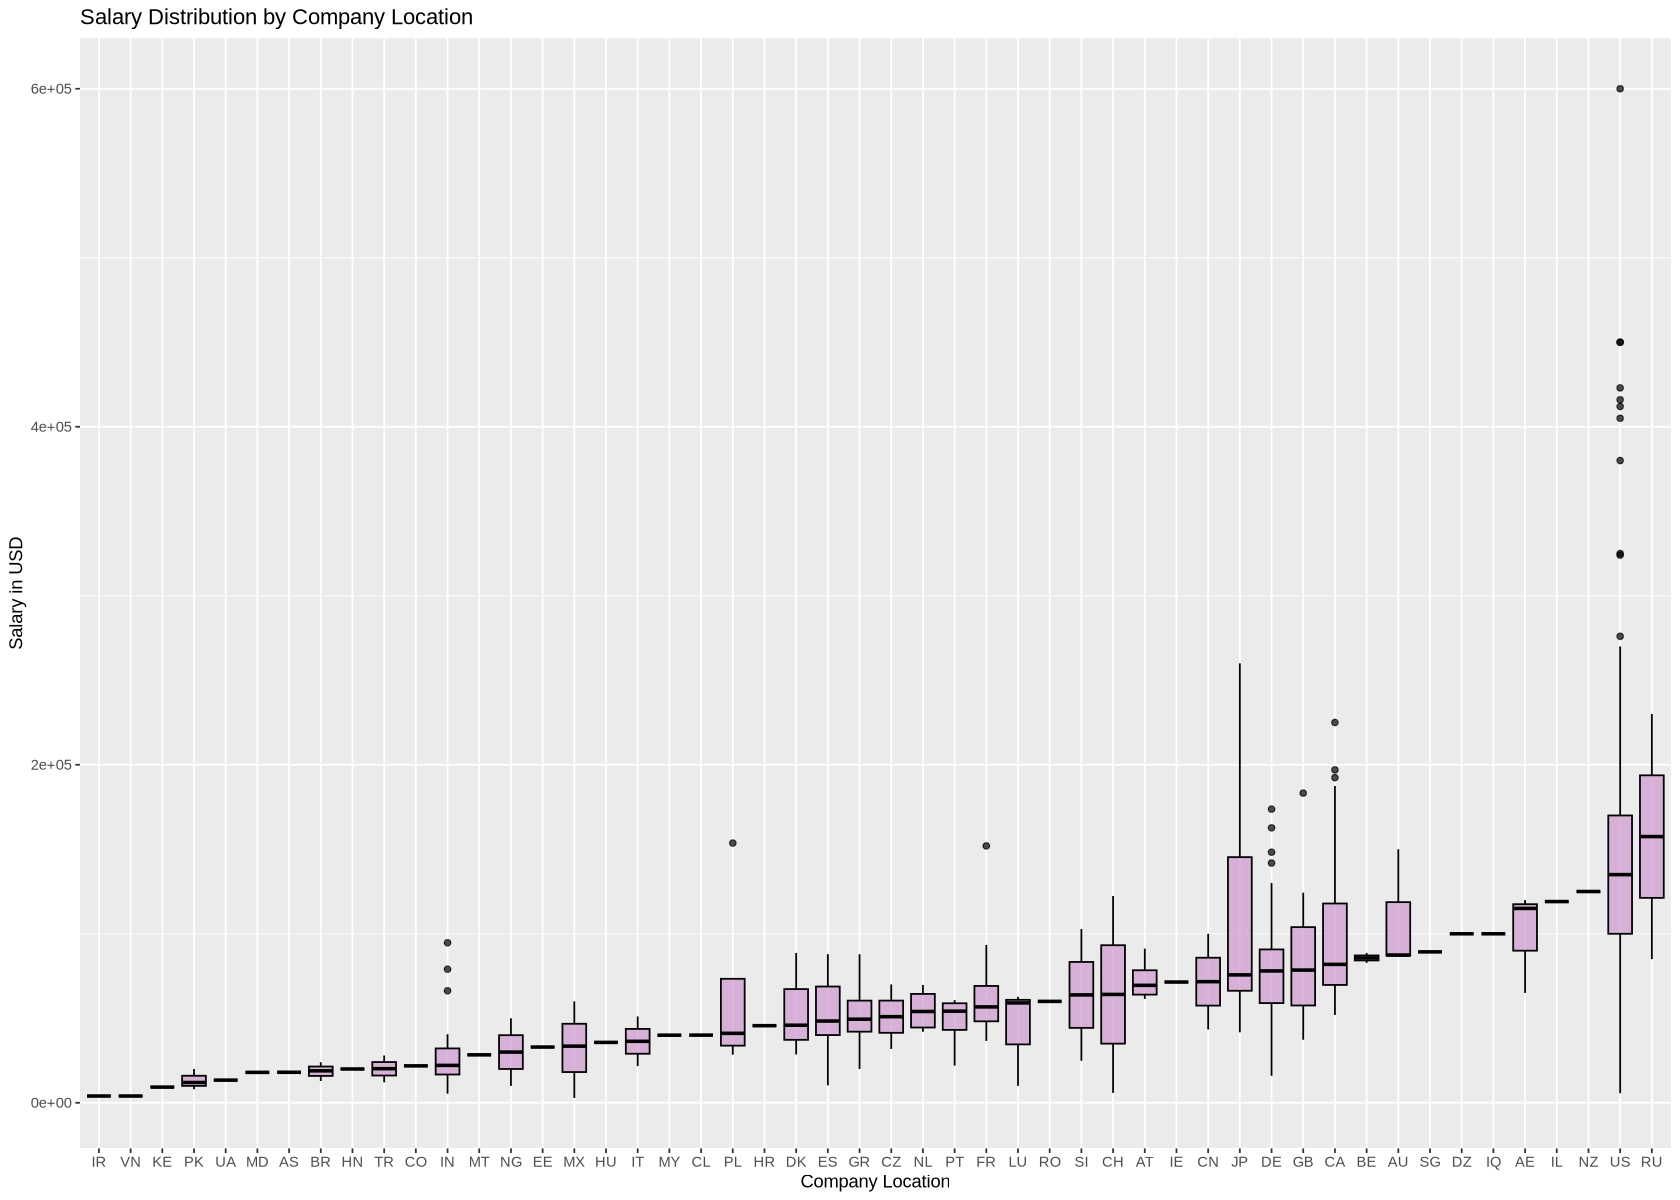

In [15]:
ggplot(data, aes(x = reorder(job_title, salary_in_usd, median), y = salary_in_usd)) +
    geom_boxplot(fill = "skyblue", color = "black", alpha = 0.7) +
    labs(title = "Salary Distribution by Job Title", x = "Job Title", y = "Salary in USD") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    coord_flip()

ggplot(data, aes(x = reorder(company_location, salary_in_usd, median), y = salary_in_usd)) +
    geom_boxplot(fill = "plum3", color = "black", alpha = 0.7) +
    labs(title = "Salary Distribution by Company Location", x = "Company Location", y = "Salary in USD")

#### Bar Charts for Count Distribution of Categorical Variables

It is also important to understand the distribution of counts for the categorial variables to avoid imbalanced data and related issues, such as bias towards categories with high counts or overfitting to categories with low counts. These problems could affect the model's performance and generalization on new, unseen data.

Warning message:
“attributes are not identical across measure variables; they will be dropped”
Warning message:
“attributes are not identical across measure variables; they will be dropped”


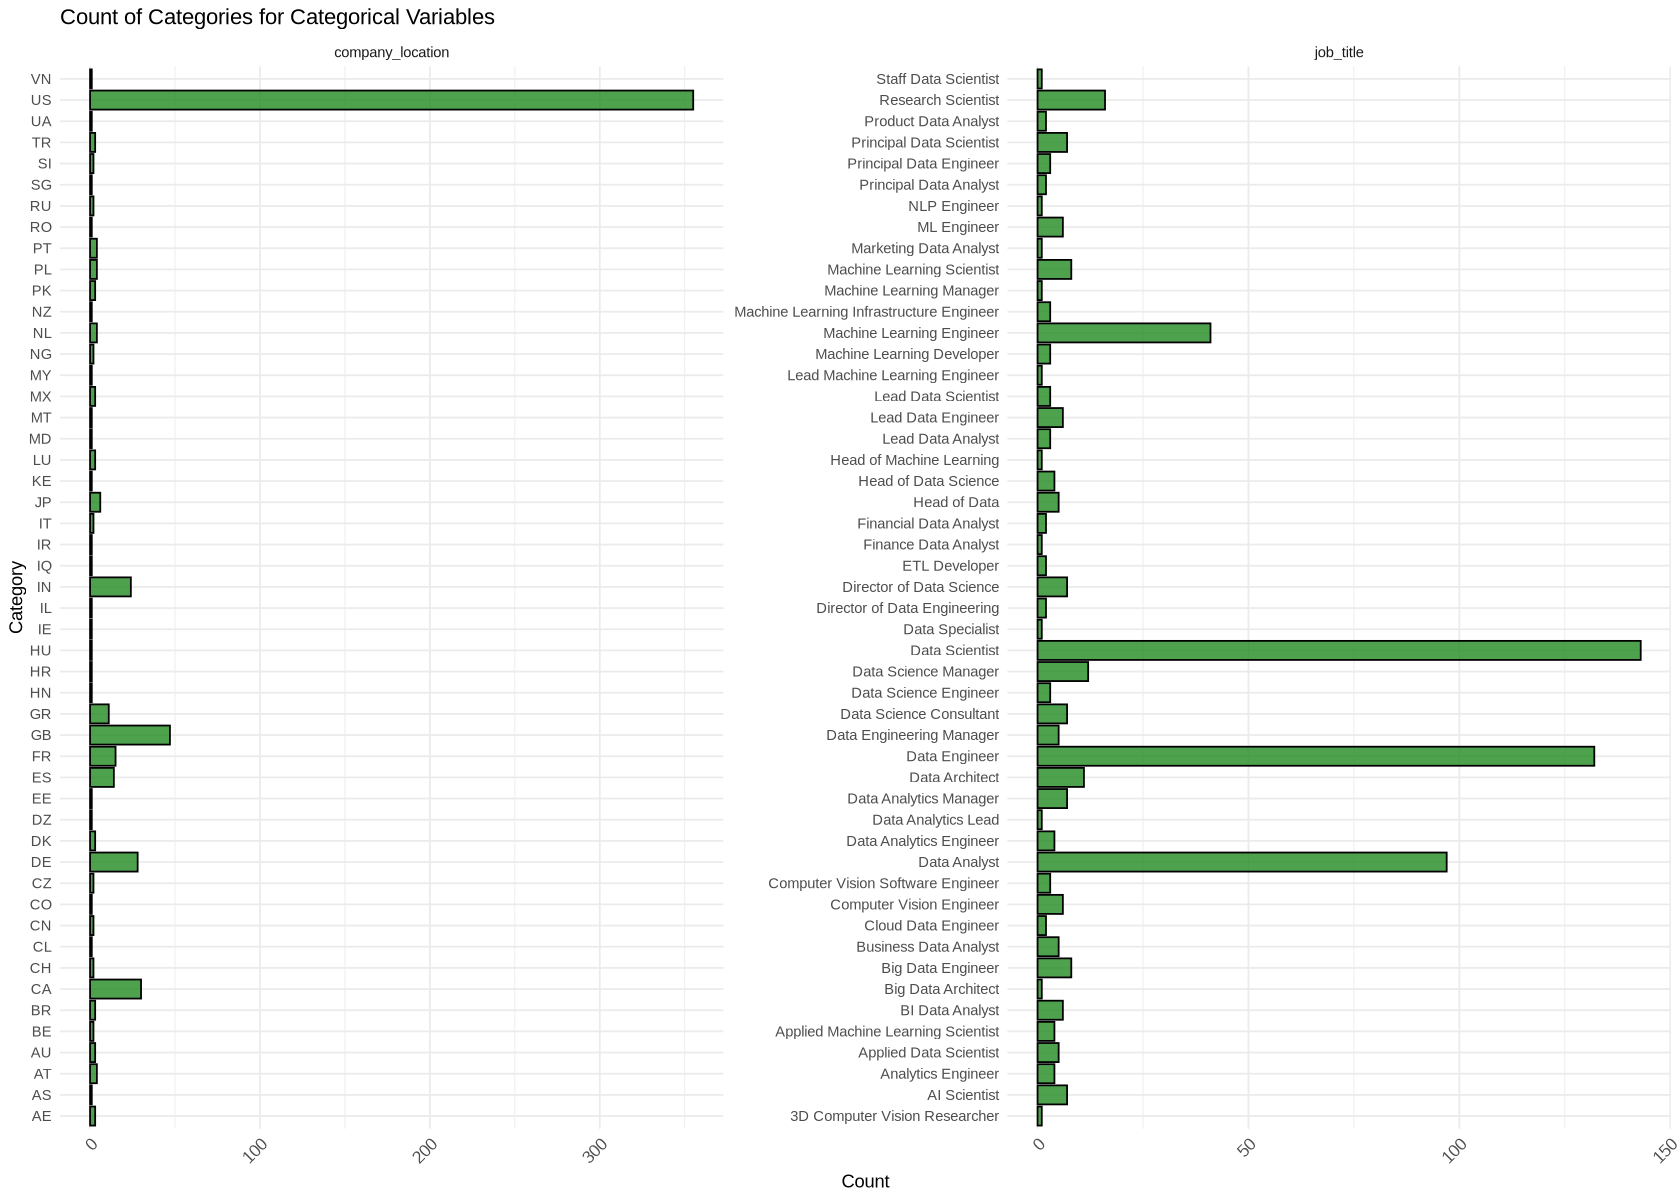

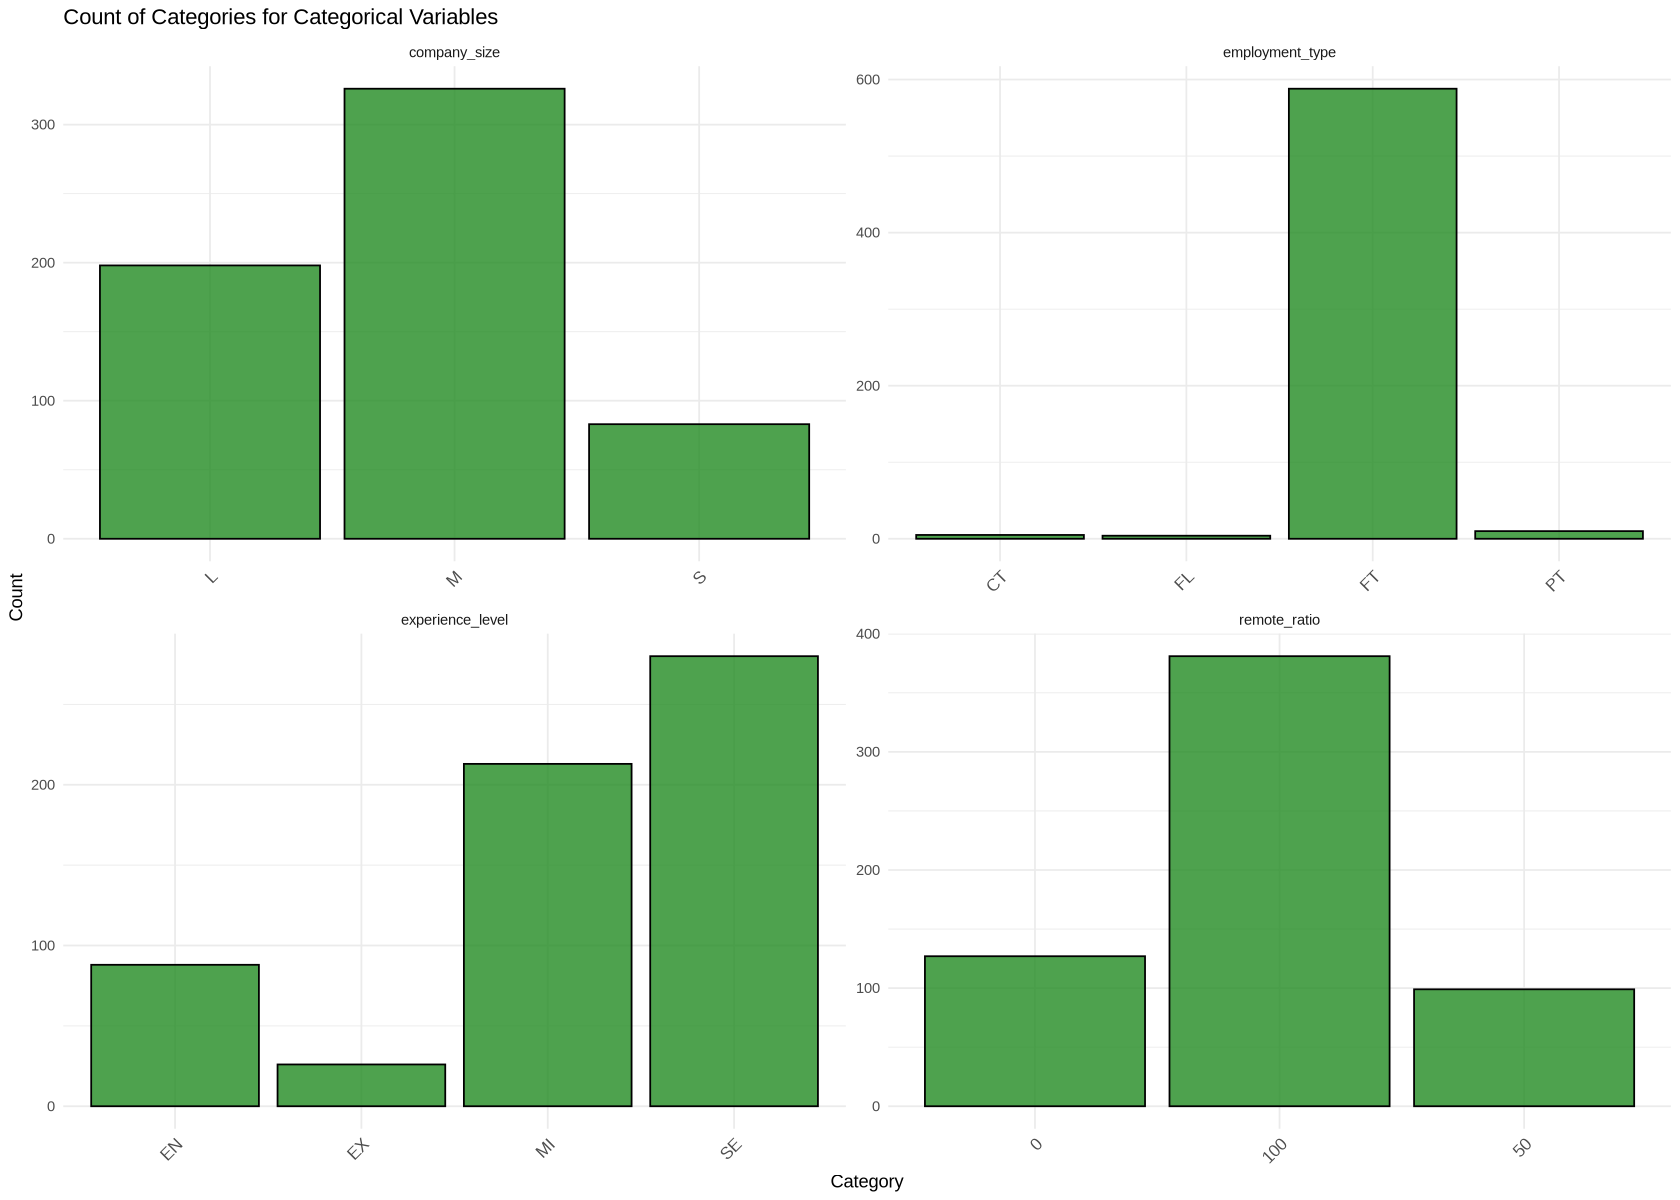

In [25]:
options(repr.plot.width = 14, repr.plot.height = 10) 

data %>%
    select(job_title, company_location) %>%
    gather(key = "Variable", value = "Value") %>%
    ggplot(aes(x = as.factor(Value))) +
    geom_bar(fill = "forestgreen", color = "black", alpha = 0.8) +
    facet_wrap(~ Variable, scales = "free", ncol = 2) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) +
    labs(title = "Count of Categories for Categorical Variables", x = "Category", y = "Count") +
    coord_flip()

data %>%
    select(employment_type, experience_level, remote_ratio, company_size) %>%
    gather(key = "Variable", value = "Value") %>%
    ggplot(aes(x = as.factor(Value))) +
    geom_bar(fill = "forestgreen", color = "black", alpha = 0.8) +
    facet_wrap(~ Variable, scales = "free", ncol = 2) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10)) +
    labs(title = "Count of Categories for Categorical Variables", x = "Category", y = "Count")